In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
from dateutil import parser

In [2]:
# Loading data in data frame
# EDA: Data sourcing
loan_df = pd.read_csv("loan.csv", header=0, low_memory=False)
print (loan_df.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

In [3]:
loan_df.shape


(39717, 111)

In [4]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
# EDA: Data Cleaning
# Filtering columns which should be dropped from the dataset which have NA only
# Eg: Columns we got from the excel: AJ + AY onwards 
loan_df.dropna(how='all', axis='columns', inplace=True)        

In [6]:
loan_df.shape

(39717, 57)

In [7]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [8]:
# columns_to_drop contains list of columns to be filtered - either they have same value or 
# don't contribute in analysis 
# member_id may not be useful but we are keeping it to have a record identifier
# The customer variables are not available at the time of loan processing and thats why excluding them
# funded_amnt is the amount which reviewer says but actual value is given by funded_amnt_inv which we have
# Hence we are dropping funded_amnt
columns_to_drop = [
                   'id', 'member_id', 'emp_title', 'pymnt_plan', 'url', 'desc', 'title', 'zip_code',
                   'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 
                   'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
                   'delinq_amnt', 'tax_liens','collection_recovery_fee', 'inq_last_6mths',
                   'pymnt_plan', 'sub_grade', 'delinq_2yrs', 'earliest_cr_line', 'open_acc',
                   'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
                    'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
                    'total_rec_late_fee', 'recoveries', 'last_pymnt_d', 'last_pymnt_amnt',
                    'last_credit_pull_d', 'funded_amnt' 
                  ]
loan_df.drop(columns_to_drop, axis = 1, inplace = True)

In [9]:
loan_df.shape

(39717, 19)

In [10]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [11]:
# Before doing any further analysis getting rid of records having loan_status as current
# we are removing this because this we can't predict the behaiour here.
loan_df = loan_df[loan_df.loan_status != "Current"]

In [12]:
loan_df.shape

(38577, 19)

In [13]:
# Now lets clean up/ modify few columns based on % missing data
missing_data = (loan_df.isna().sum()/len(loan_df.index))*100

cols_gt_60_percent = []
for k,v in missing_data.items():
    if v > 60:
        cols_gt_60_percent.append(k)

# mths_since_last_delinq     64.559193
# mths_since_last_record     92.897322
# next_pymnt_d              100.000000 < -- this is not given correctly by pandas lib
loan_df.drop(cols_gt_60_percent, axis = 1, inplace = True)

In [14]:
loan_df.shape

(38577, 16)

In [15]:
# Removing months word from term column
loan_df['term'] = list(map(lambda a:a.split(' ')[1], loan_df['term']))

In [16]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,4975.0,36,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500.0,60,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400.0,36,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000.0,36,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,5000,5000.0,36,7.90%,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0


In [17]:
# Removing % from int_rate and converting result to a float
loan_df['int_rate'] = list(map(lambda a:float(a.split('%')[0]), loan_df['int_rate']))

In [18]:
# converting annual_inc and funded_amnt_inv to int as there are very few having float values
loan_df['annual_inc'] = list(map(lambda a:int(a), loan_df['annual_inc']))
loan_df['funded_amnt_inv'] = list(map(lambda a:int(a), loan_df['funded_amnt_inv']))

In [19]:
# Finding columns which needs to be filled properly 
loan_df.isna().sum() 

loan_amnt                  0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
pub_rec_bankruptcies     697
dtype: int64

In [20]:
# Taking mode to fill na values for emp_length and pub_rec_bankruptcies
loan_df['emp_length'].fillna(loan_df['emp_length'].mode()[0], inplace = True)
loan_df['pub_rec_bankruptcies'].fillna(loan_df['pub_rec_bankruptcies'].mode()[0], inplace = True)
loan_df['emp_length']
loan_df['pub_rec_bankruptcies']

0        0.0
1        0.0
2        0.0
3        0.0
5        0.0
        ... 
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Name: pub_rec_bankruptcies, Length: 38577, dtype: float64

In [21]:
# Here we see 9 bins are already proper only < 1 year and 10+ years needs to be corrected
# we are making < 1 year as 0 year and 10+ years as 10
loan_df['emp_length'] = loan_df['emp_length'].map(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0]))

In [22]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,4975,36,10.65,162.87,B,10,RENT,24000,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,60,15.27,59.83,C,0,RENT,30000,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400,36,15.96,84.33,C,10,RENT,12252,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000,36,13.49,339.31,C,10,RENT,49200,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,5000,5000,36,7.90,156.46,A,3,RENT,36000,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0


In [23]:
# converting annual_inc to int as there are very few having float values
loan_df['annual_inc'] = list(map(lambda a:int(a), loan_df['annual_inc']))

In [24]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,4975,36,10.65,162.87,B,10,RENT,24000,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,60,15.27,59.83,C,0,RENT,30000,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400,36,15.96,84.33,C,10,RENT,12252,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000,36,13.49,339.31,C,10,RENT,49200,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,5000,5000,36,7.90,156.46,A,3,RENT,36000,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0


In [25]:
# EDA - Derived Metrics
# We should convert issue_d to datetime object and extract year and month
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'].apply(lambda x: datetime.strptime(x,'%b-%y'))).dt.strftime('%m-%Y')

In [26]:
loan_df['issue_d_year'] = pd.DatetimeIndex(loan_df['issue_d']).year

In [27]:
loan_df['issue_d_month'] = pd.DatetimeIndex(loan_df['issue_d']).month

In [28]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_d_year,issue_d_month
0,5000,4975,36,10.65,162.87,B,10,RENT,24000,Verified,12-2011,Fully Paid,credit_card,AZ,27.65,0.0,2011,12
1,2500,2500,60,15.27,59.83,C,0,RENT,30000,Source Verified,12-2011,Charged Off,car,GA,1.00,0.0,2011,12
2,2400,2400,36,15.96,84.33,C,10,RENT,12252,Not Verified,12-2011,Fully Paid,small_business,IL,8.72,0.0,2011,12
3,10000,10000,36,13.49,339.31,C,10,RENT,49200,Source Verified,12-2011,Fully Paid,other,CA,20.00,0.0,2011,12
5,5000,5000,36,7.90,156.46,A,3,RENT,36000,Source Verified,12-2011,Fully Paid,wedding,AZ,11.20,0.0,2011,12


In [29]:
# Removing outliers for funded_amnt_inv column
# Basically those records whose funded_amnt_inv is 0 can not have any int_rate or 
# loan_status as Fully Paid or charged off. These are clearly wrongly entered data and hence outliers.
loan_df = loan_df[loan_df['funded_amnt_inv'] != 0]

In [30]:
loan_df.shape

(38427, 18)

<AxesSubplot:title={'center':'boxplot'}>

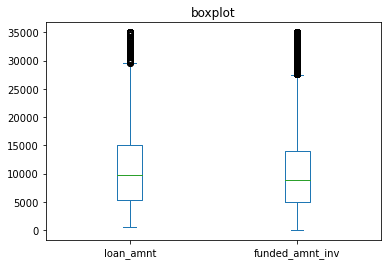

In [31]:
# EDA: Univariate Analysis
# A. Finding outliers in loan_amnt, funded_amnt_inv, annual_inc, int_rate, dti
# First checking outliers in loan_amnt and funded_amnt_inv as their ranges are similar
loan_df[['loan_amnt', 'funded_amnt_inv']].plot(kind='box', title='boxplot')

<AxesSubplot:title={'center':'boxplot'}>

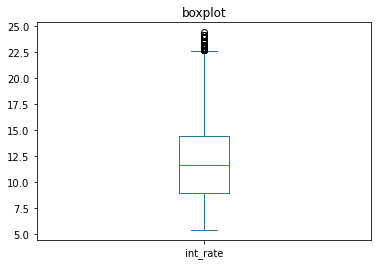

In [32]:
# Data looks fine for loan_amnt and funded_amnt_inv and doesn't seem to have outliers as
# data is continuously growing. So not doing anything for these.

# Now lests check for int_rate
loan_df[['int_rate']].plot(kind='box', title='boxplot')

<AxesSubplot:title={'center':'boxplot'}>

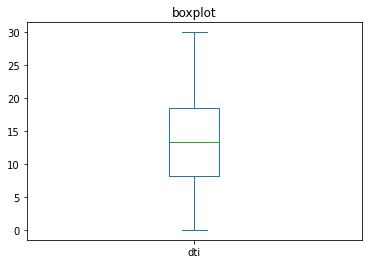

In [33]:
# Data looks fine for int_rate and doesn't seem to have outliers as
# data is continuously growing. So not doing anything for these.

# Now lets check for dti
loan_df[['dti']].plot(kind='box', title='boxplot')

<AxesSubplot:title={'center':'boxplot'}>

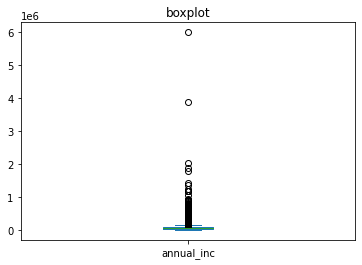

In [34]:
# Data looks fine for dti and doesn't seem to have outliers as
# data is continuously growing. So not doing anything for these.

# Now lets check for annual_inc
loan_df[['annual_inc']].plot(kind='box', title='boxplot')

In [35]:
# We could see clearly see outliers, lets find the range to drop
outlier_finder_range = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]
loan_df.annual_inc.quantile(outlier_finder_range)

0.00       4000.00
0.10      30000.00
0.20      37200.00
0.30      44680.00
0.40      50004.00
0.50      59000.00
0.60      65159.20
0.70      75000.00
0.80      90000.00
0.90     115172.40
0.91     120000.00
0.92     122004.00
0.93     127786.18
0.94     134609.12
0.95     140004.00
0.96     150000.00
0.97     165000.00
0.98     187000.00
0.99     234444.00
1.00    6000000.00
Name: annual_inc, dtype: float64

In [36]:
# We can clearly see that data after 95% or 0.95 is in range of outlier
outlier_quatile_annual_inc = loan_df['annual_inc'].quantile(0.95)
loan_df = loan_df[loan_df.annual_inc <= outlier_quatile_annual_inc]

In [37]:
loan_df.shape

(36509, 18)

In [38]:
# We created the modified csv to analyze on smaller data
# loan_df.to_csv('modified_loan.csv', index = None, header=True)

In [39]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_d_year,issue_d_month
0,5000,4975,36,10.65,162.87,B,10,RENT,24000,Verified,12-2011,Fully Paid,credit_card,AZ,27.65,0.0,2011,12
1,2500,2500,60,15.27,59.83,C,0,RENT,30000,Source Verified,12-2011,Charged Off,car,GA,1.00,0.0,2011,12
2,2400,2400,36,15.96,84.33,C,10,RENT,12252,Not Verified,12-2011,Fully Paid,small_business,IL,8.72,0.0,2011,12
3,10000,10000,36,13.49,339.31,C,10,RENT,49200,Source Verified,12-2011,Fully Paid,other,CA,20.00,0.0,2011,12
5,5000,5000,36,7.90,156.46,A,3,RENT,36000,Source Verified,12-2011,Fully Paid,wedding,AZ,11.20,0.0,2011,12


In [40]:
# EDA: Derived Metrics
# this will be helful for heapmap and other analysis
loan_df['defaulter'] = [0 if x == 'Fully Paid' else 1 for x in loan_df['loan_status']]

Text(0, 0.5, 'Count')

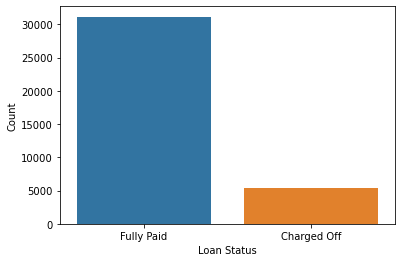

In [41]:
# EDA: Bivariate Analysis
# We will compare loan_status with rest of the features/columns to find the Defaulter pattern
# We have 2 status for loan_status : Charged Off and Fully Paid
# We will compare results of both Charged Off and Fully Paid to discover correct pattern
# else it may be possible that we may find a pattern for Charged Off that also exists for Fully Paid.

# Plotting to see split of loan_status viz. Fully paid vs Charged Off 
sns.countplot(x = 'loan_status', data = loan_df)
plt.xlabel('Loan Status')
plt.ylabel('Count')
# this just shows Fully paid vs Charged Off split

In [42]:
# create_feature_bins will create a new feature group for a feature in dataframe
def create_feature_bins(df, var_type):
    # For some fields like emp_length, term etc we already have bins but for other making now
    group_attribute = ""
    if (var_type == 'funded_amnt_inv'):
        df['funded_amnt_inv_groups'] = pd.cut(loan_df['funded_amnt_inv'], bins=8, precision=0, 
                                       labels =['0-5000', '5001-10000', '10001-15000', '15001-20000', '20001-25000', 
                                        '25001-30000', '30001-35000', '35000-40000'])
        group_attribute = 'funded_amnt_inv_groups'
        
    elif (var_type == 'loan_amnt'):
        df['loan_amount_groups'] = pd.cut(loan_df['loan_amnt'], bins=8, precision=0, 
                                       labels =['0-5000', '5001-10000', '10001-15000', '15001-20000', '20001-25000', 
                                        '25001-30000', '30001-35000', '35000-40000'])
        group_attribute = 'loan_amount_groups'
        
    elif (var_type == 'int_rate'):
        df['int_rate_groups'] = pd.cut(loan_df['int_rate'], bins=5, precision=0, 
                                       labels =['0-5', '6-10', '11-15', '16-20', '21-25'])
        group_attribute = 'int_rate_groups'
        
    elif(var_type == 'annual_inc'):
        df['annual_inc_groups'] = pd.cut(loan_df['annual_inc'], bins=8, precision=0, 
                                       labels =['0-20000', '20001-40000','40001-60000', '60001-80000',
                                                '80001-100000', '100001-120000', '120001-140000','140001-160000'])
        group_attribute = 'annual_inc_groups'
        
    elif(var_type == 'dti'):
        df['dti_groups'] =   pd.cut(loan_df['dti'], bins=6, precision=0,
                                   labels =['0-5', '6-10', '11-15', '16-20', '21-25', '26-30']) 
        group_attribute = 'dti_groups'
        
    return group_attribute

In [43]:
# plt_graph is a generic function which will be used to draw various plots
def plt_graph(df, x_var, x_label, title, hue_var=None, rot_flag=0, fig_size_x=14, fig_size_y=8):
    
    num_records = len(df)
    dims = (fig_size_x,fig_size_y)
    plt.figure(figsize=dims)
    ax = sns.countplot(x=x_var, data=df,hue=hue_var,palette="Set3")
    plt.title(title)
    plt.xlabel(x_label)

    ax.yaxis.tick_left()
    ax.yaxis.tick_right()
    
    if(rot_flag==1):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
    ax.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/num_records), (x.mean(), y), 
                ha='center', va='bottom') 

    
    ax.grid(None)

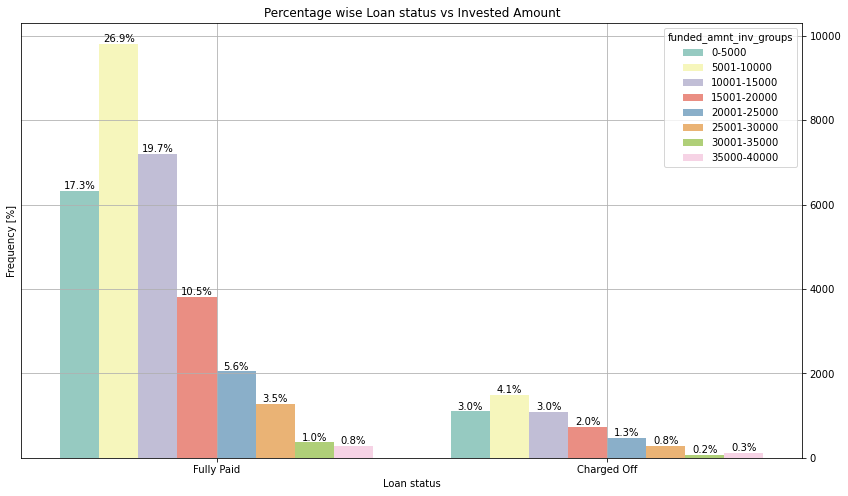

In [44]:
# Analyzing funded_amnt_inv for charged off vs fully paid
group_attribute = create_feature_bins(loan_df, 'funded_amnt_inv')
plt_graph(loan_df, "loan_status",'Loan status','Percentage wise Loan status vs Invested Amount', group_attribute)

# Analysis
# We see funded_amnt_inv is positively correlated with both Charged off and Fully Paid. 
# We see that Employees who have exp 10+, 0, 2 & 3 years are likely to become Defaulters.

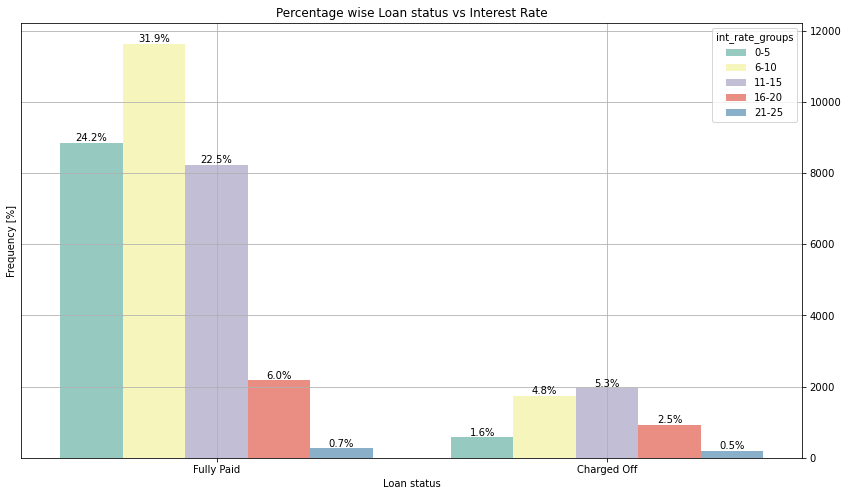

In [45]:
# Analyzing int_rate for charged off vs fully paid
group_attribute = create_feature_bins(loan_df, 'int_rate')
plt_graph(loan_df, "loan_status",'Loan status','Percentage wise Loan status vs Interest Rate', group_attribute)

# Analysis 

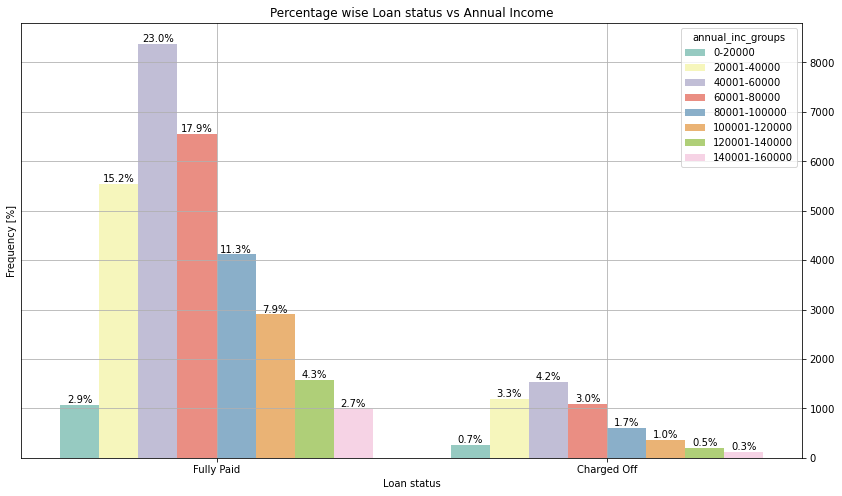

In [46]:
# Analyzing annual_inc for charged off vs fully paid
group_attribute = create_feature_bins(loan_df, 'annual_inc')
plt_graph(loan_df, "loan_status",'Loan status','Percentage wise Loan status vs Annual Income', group_attribute)

# Analysis 

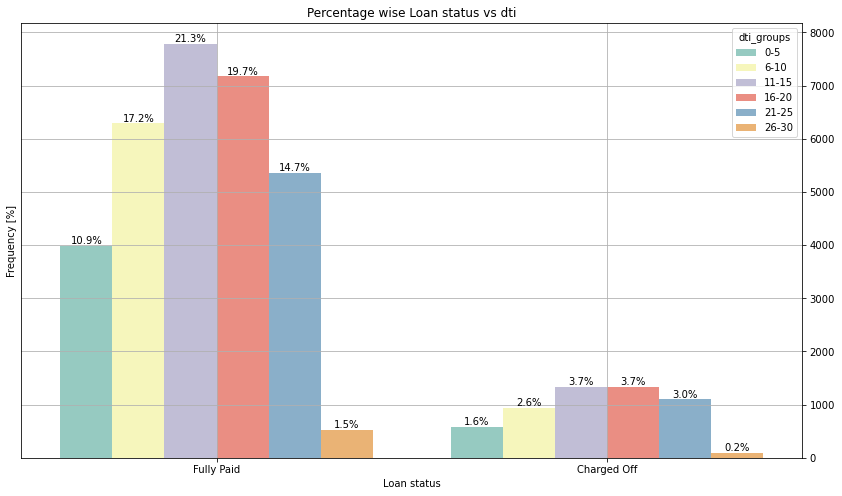

In [47]:
# Analyzing dti for charged off vs fully paid
group_attribute = create_feature_bins(loan_df, 'dti')
plt_graph(loan_df, "loan_status",'Loan status','Percentage wise Loan status vs dti', group_attribute)  

# Analysis 

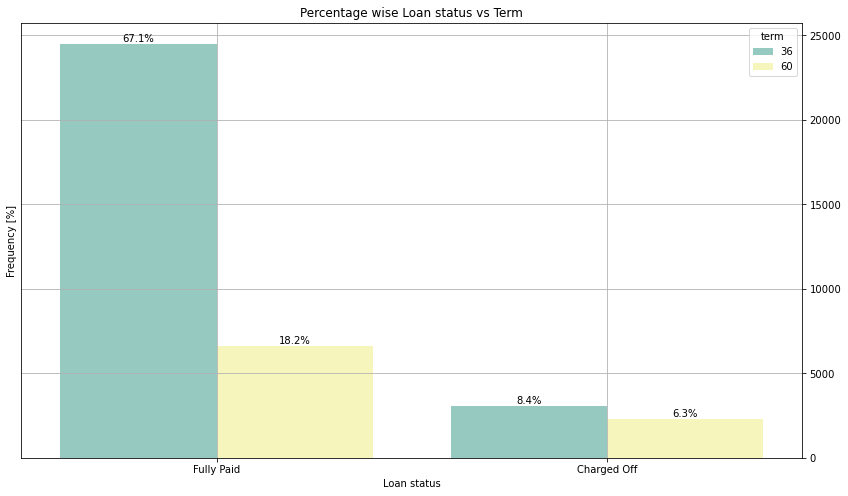

In [48]:
# Analyzing term for charged off vs fully paid
plt_graph(loan_df, "loan_status",'Loan status','Percentage wise Loan status vs Term','term')   

# Analysis 

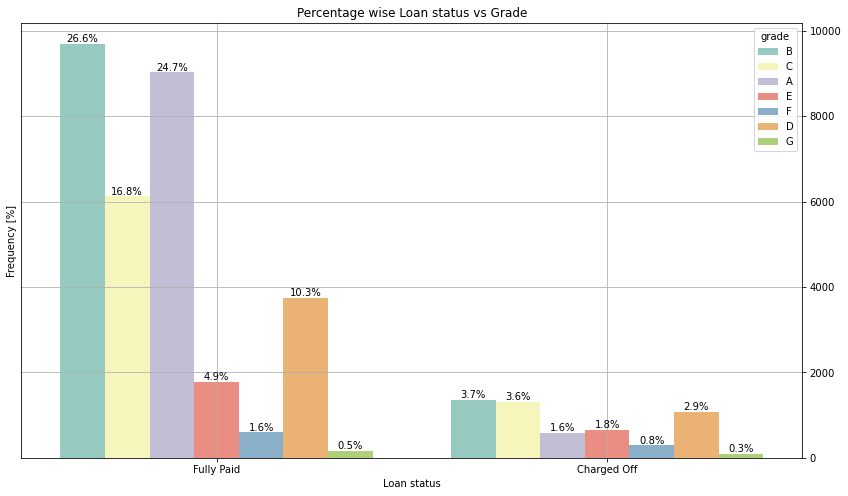

In [49]:
# Analyzing grade for charged off vs fully paid
plt_graph(loan_df, "loan_status",'Loan status','Percentage wise Loan status vs Grade','grade')   

# Analysis 

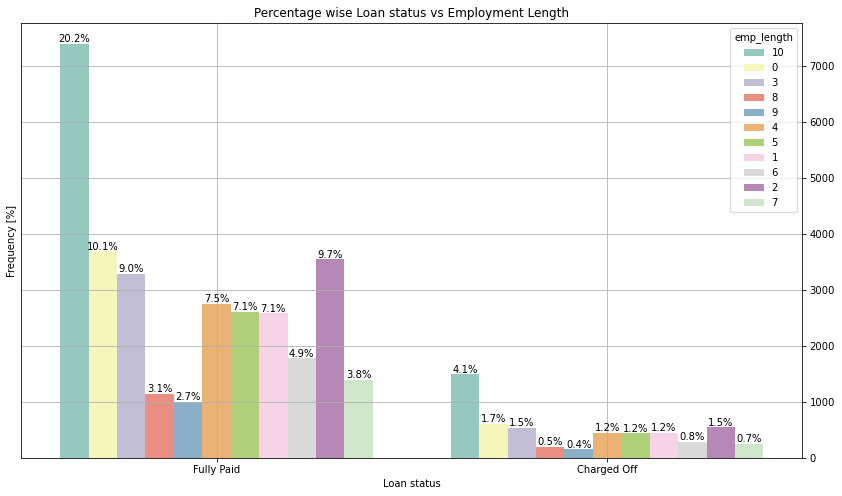

In [50]:
# Analyzing Employment Length for charged off vs Fully paid 
plt_graph(loan_df, "loan_status",'Loan status','Percentage wise Loan status vs Employment Length','emp_length')   

# Analysis
# We see emp length is positively correlated with both Charged off and Fully Paid. 
# Basically emp lenght may not be a good criteria to detect Defaulters.
# Also we see that Employees who have exp 10+, 0, 2 & 3 years are likely to become Defaulters.

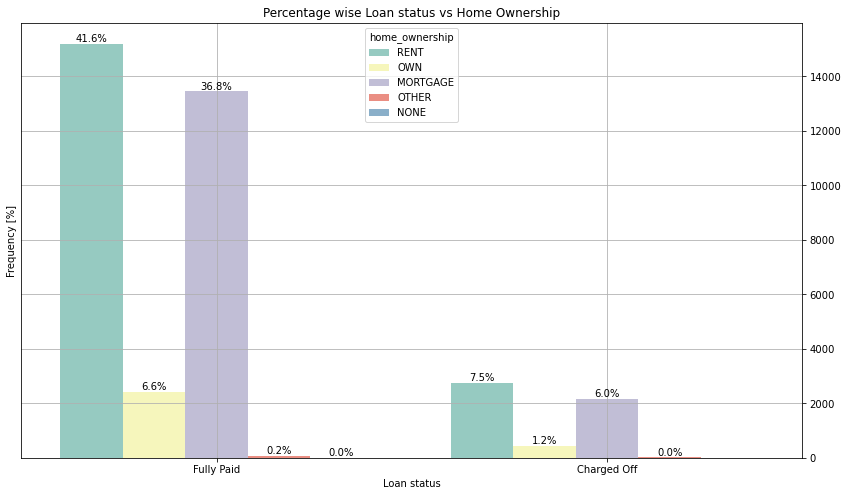

In [51]:
# Analyzing Home Ownership for charged off vs Fully paid 
plt_graph(loan_df, "loan_status",'Loan status','Percentage wise Loan status vs Home Ownership','home_ownership')   

# Analysis


In [52]:
# Analyzing Loan Issue Year for charged off vs Fully paid 
print (loan_df["issue_d_year"])
#plt_graph(loan_df, "loan_status",'Loan status','Percentage wise Loan status vs Loan Issue Year','issue_d_year')   

# Analysis


0        2011
1        2011
2        2011
3        2011
5        2011
         ... 
39711    2007
39712    2007
39713    2007
39714    2007
39716    2007
Name: issue_d_year, Length: 36509, dtype: int64


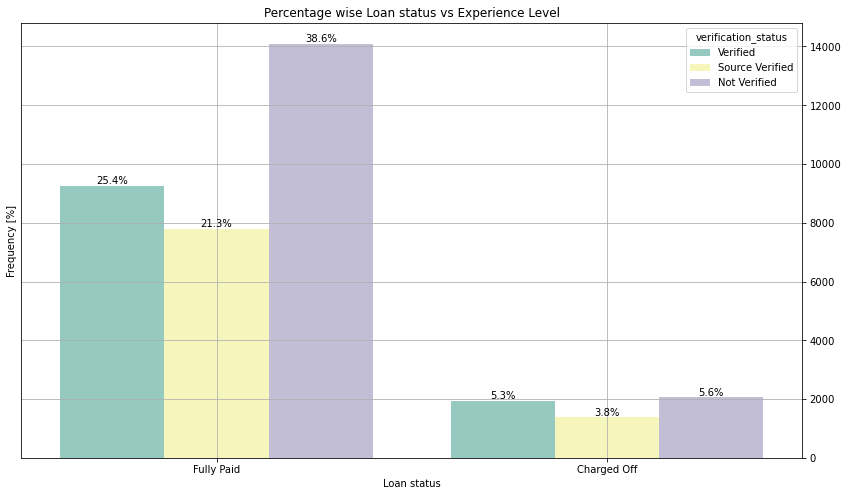

In [53]:
# Analyzing Verification Status for charged off vs Fully paid 
plt_graph(loan_df, "loan_status",'Loan status','Percentage wise Loan status vs Experience Level','verification_status')   

# Analysis


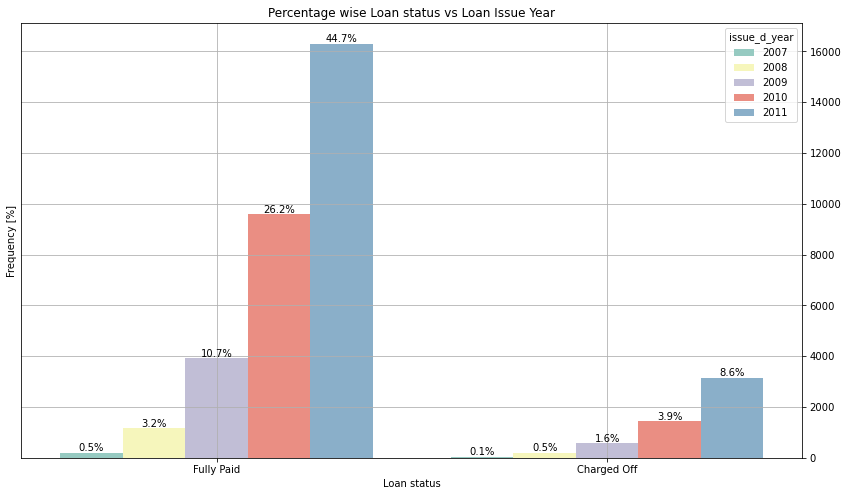

In [54]:
# Analyzing Loan Issue Year for charged off vs Fully paid 
plt_graph(loan_df, "loan_status",'Loan status','Percentage wise Loan status vs Loan Issue Year','issue_d_year')   

# Analysis


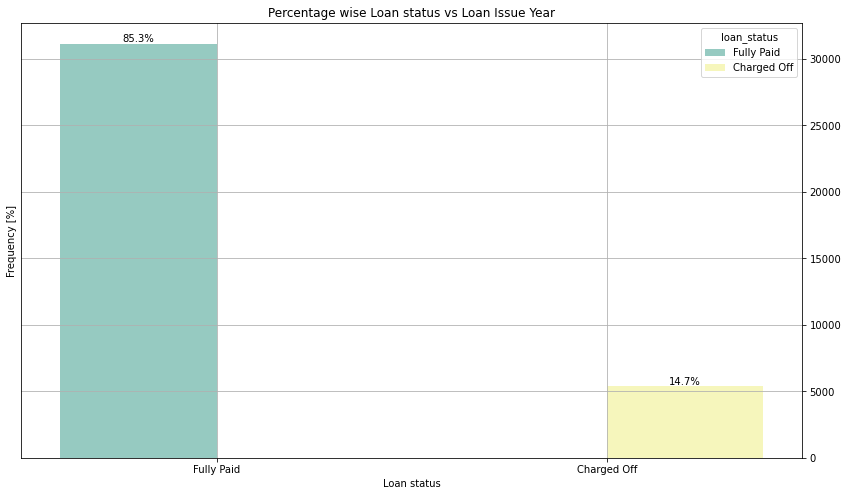

In [55]:
# Analyzing Loan Status for charged off vs Fully paid 
plt_graph(loan_df, "loan_status",'Loan status','Percentage wise Loan status vs Loan Issue Year','loan_status')   

# Analysis


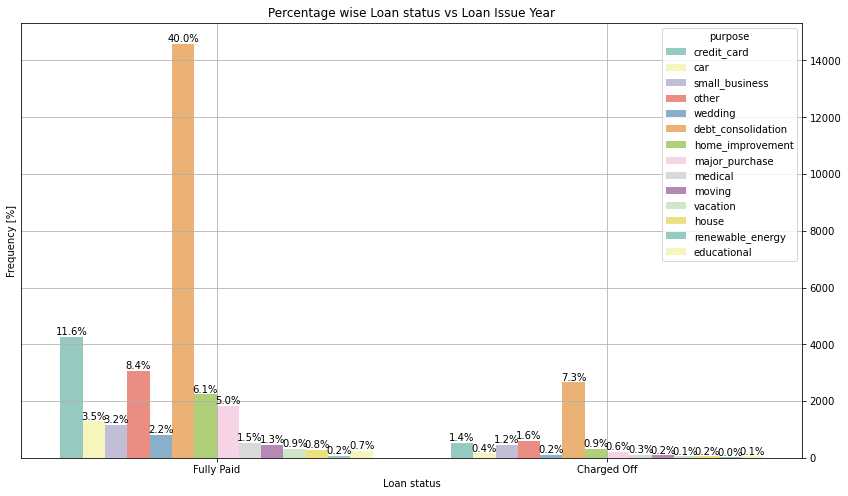

In [56]:
# Analyzing Purpose for charged off vs Fully paid 
plt_graph(loan_df, "loan_status",'Loan status','Percentage wise Loan status vs Loan Issue Year','purpose')   

# Analysis


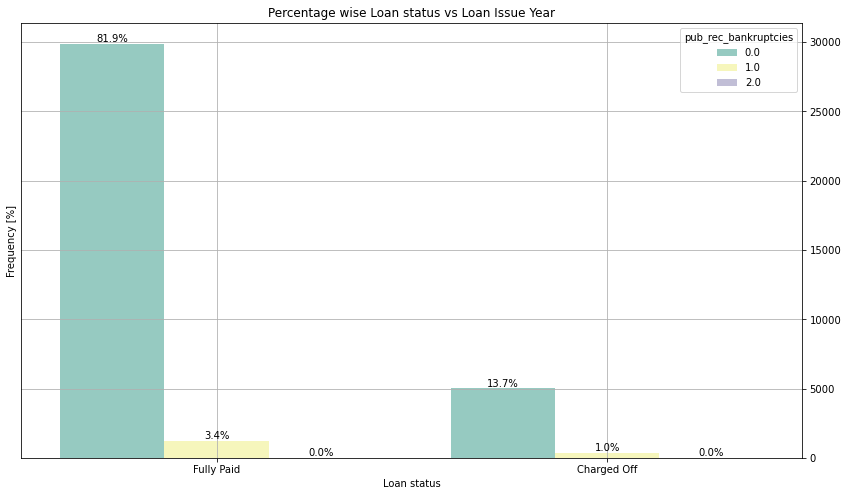

In [57]:
# Analyzing Number of public record bankruptcies for charged off vs Fully paid 
plt_graph(loan_df, "loan_status",'Loan status','Percentage wise Loan status vs Loan Issue Year','pub_rec_bankruptcies')   


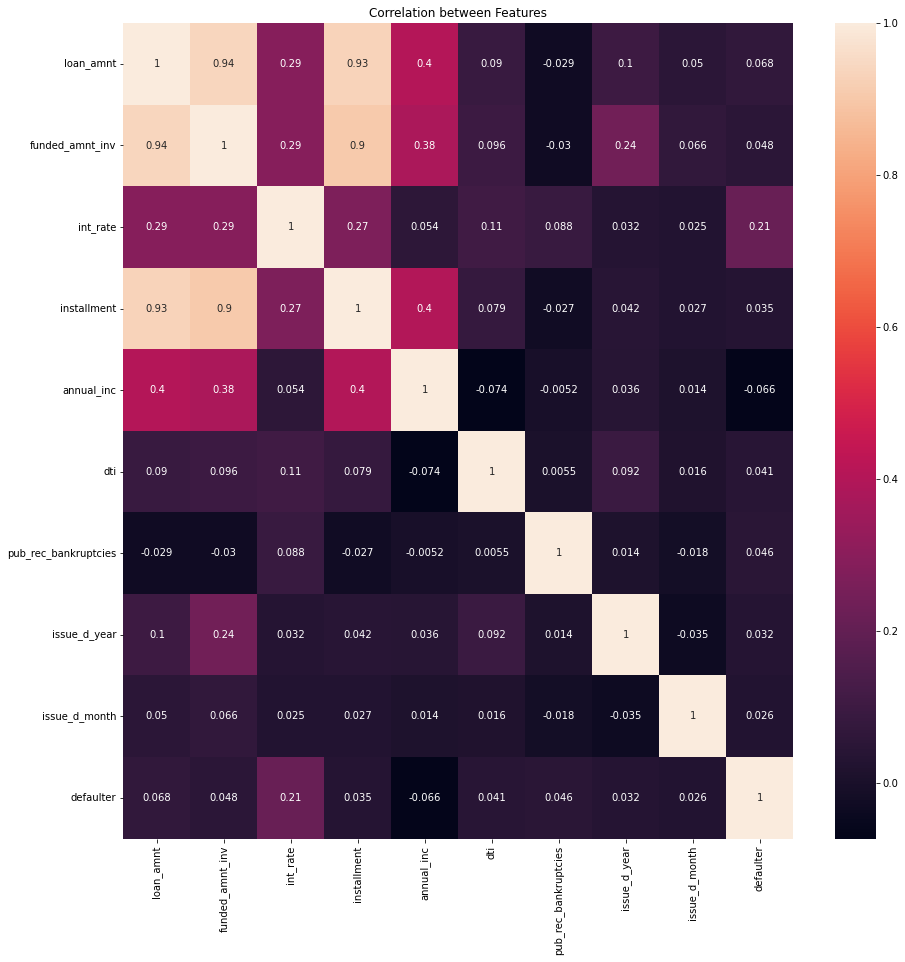

In [59]:
# Drawing heapmap

corr_matrix = loan_df.corr()
plt.figure(figsize=(15, 15))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True)
#top, bottom = ax.get_ylim()
#ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Features")
plt.show()


In [60]:
corr_matrix

,loan_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,pub_rec_bankruptcies,issue_d_year,issue_d_month,defaulter
loan_amnt,1.000000,0.938483,0.290811,0.931504,0.403118,0.089771,-0.029062,0.100405,0.049842,0.067736
funded_amnt_inv,0.938483,1.000000,0.288521,0.903822,0.382836,0.096304,-0.030454,0.238797,0.066061,0.048105
int_rate,0.290811,0.288521,1.000000,0.268695,0.053604,0.110729,0.088416,0.032296,0.025014,0.213302
installment,0.931504,0.903822,0.268695,1.000000,0.398158,0.078809,-0.027064,0.041975,0.026869,0.034510
annual_inc,0.403118,0.382836,0.053604,0.398158,1.000000,-0.073651,-0.005227,0.036159,0.013546,-0.066138
dti,0.089771,0.096304,0.110729,0.078809,-0.073651,1.000000,0.005474,0.091766,0.016288,0.041181
pub_rec_bankruptcies,-0.029062,-0.030454,0.088416,-0.027064,-0.005227,0.005474,1.000000,0.014029,-0.017713,0.046455
issue_d_year,0.100405,0.238797,0.032296,0.041975,0.036159,0.091766,0.014029,1.000000,-0.035341,0.032427
issue_d_month,0.049842,0.066061,0.025014,0.026869,0.013546,0.016288,-0.017713,-0.035341,1.000000,0.025965
defaulter,0.067736,0.048105,0.213302,0.034510,-0.066138,0.041181,0.046455,0.032427,0.025965,1.000000


In [61]:
# During correlation matrix analysis we found it needs data to be of numberic type and hence 
# converting them accrodingly
# Here is the list: term, emp_len, grade, home_ownership, verification, purpose,'addr_state'

# Converting object type to int for term feature
loan_df['term'] = [int(x) for x in loan_df['term']] 

# Converting object type to int for term feature 
loan_df['emp_length'] = [int(x) for x in loan_df['emp_length']] 

# Converting grade to A to G, A=65 , B=66 ...
loan_df['grade'] = [ord(x) for x in loan_df['grade']] 

# Converting home_owner type to int
home_ownership_map = {
    'RENT': 1,
    'MORTGAGE': 2,
    'NONE': 3,
    'OTHER': 4,
    'OWN': 5
}
loan_df['home_ownership'] = [home_ownership_map[x] for x in loan_df['home_ownership']]

# Converting verification type to int
verification_map = {
    'Verified': 1,
    'Not Verified': 2,
    'Source Verified': 3
}
loan_df['verification_status'] = [verification_map[x] for x in loan_df['verification_status']]

# Converting purpose type to int
# set(loan_df.purpose.to_list()) gives list of unique values
purpose_type_map = {
 'car' : 1,
 'credit_card' : 2,
 'debt_consolidation': 3,
 'educational': 4,
 'home_improvement': 5,
 'house': 6,
 'major_purchase': 7,
 'medical': 8,
 'moving': 9,
 'other': 10,
 'renewable_energy': 11,
 'small_business': 12,
 'vacation': 13,
 'wedding': 14
}
loan_df['purpose'] = [purpose_type_map[x] for x in loan_df['purpose']]

# Converting state to int
all_states = set(loan_df.addr_state.to_list())
states_map = {}
i = 1 
for state in all_states:
    states_map[state] = i
    i += 1
loan_df['addr_state'] = [states_map[x] for x in loan_df['addr_state']]

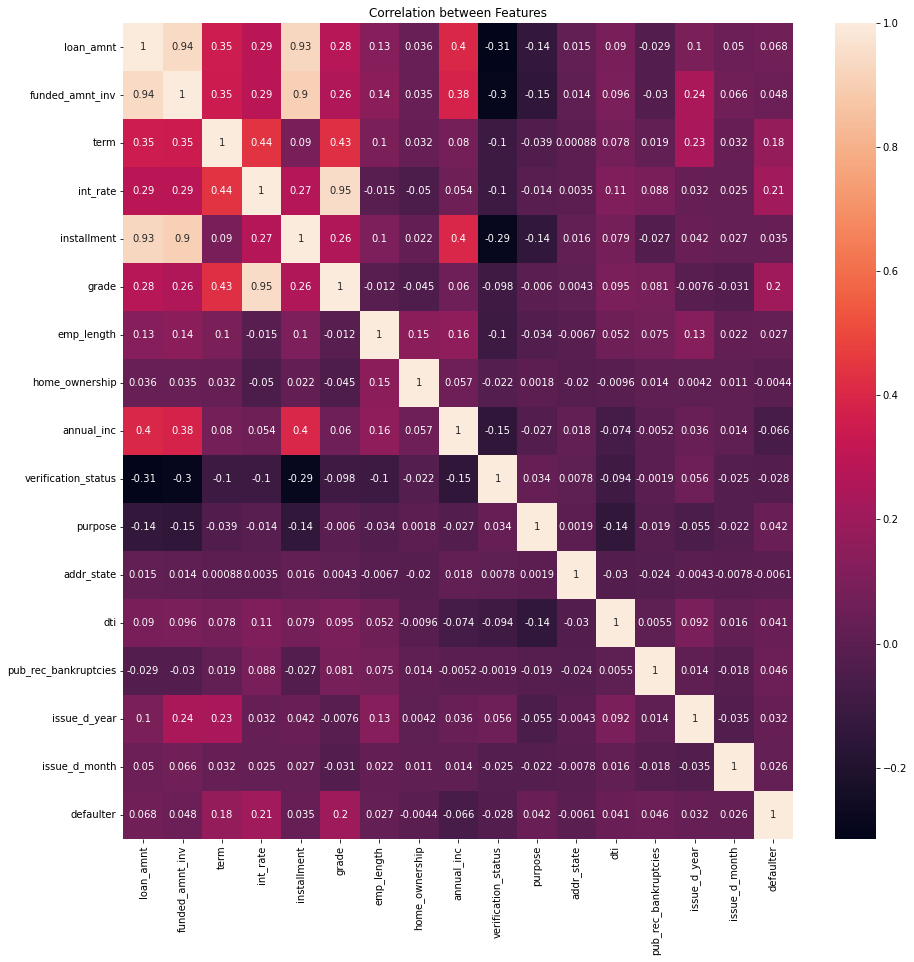

In [62]:
# Drawing heapmap

corr_matrix = loan_df.corr()
plt.figure(figsize=(15, 15))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True)
#top, bottom = ax.get_ylim()
#ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Features")
plt.show()